In [ ]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Data Processing**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Amazon_Sales_Records.csv")

In [ ]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,07-26-2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,07-30-2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

Data recived having shipment date as object so we'll convert it to datetime format

In [ ]:
#Data recived having shipment date and order date as object so converting it to datetime format
df["Ship Date"]=pd.to_datetime(df["Ship Date"])
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [ ]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
#Looking for any null values inside given data
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
df.shape

(100, 14)

In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
df.groupby("Sales Channel").count()["Item Type"]

Sales Channel
Offline    50
Online     50
Name: Item Type, dtype: int64

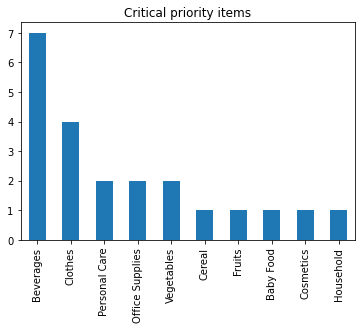

In [ ]:
df[df['Order Priority']=="C"]["Item Type"].value_counts().plot(kind='bar',title="Critical priority items")

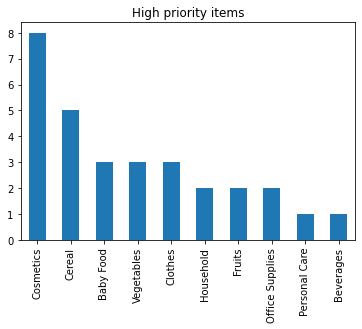

In [ ]:
df[df['Order Priority']=="H"]["Item Type"].value_counts().plot(kind='bar',title="High priority items")

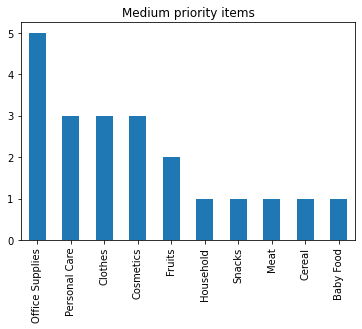

In [ ]:
df[df['Order Priority']=="M"]["Item Type"].value_counts().plot(kind='bar',title="Medium priority items")

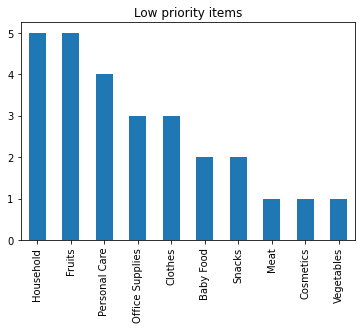

In [ ]:
df[df['Order Priority']=="L"]["Item Type"].value_counts().plot(kind='bar',title="Low priority items")

In [ ]:
#unique values present in data per column
for i in df.columns:
  print(f"{i} : {len(df[i].unique())}")

Region : 7
Country : 76
Item Type : 12
Sales Channel : 2
Order Priority : 4
Order Date : 100
Order ID : 100
Ship Date : 99
Units Sold : 99
Unit Price : 12
Unit Cost : 12
Total Revenue : 100
Total Cost : 100
Total Profit : 100


In [ ]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

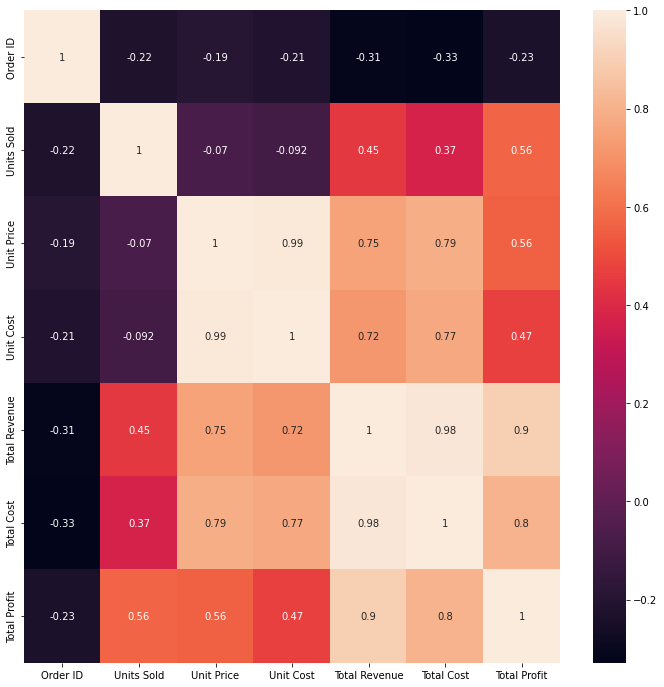

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(method="pearson"),annot=True)
plt.show()

In [ ]:
df.corr(method="pearson")

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,1.000000,-0.222907,-0.190941,-0.213201,-0.314688,-0.328944,-0.234638
Units Sold,-0.222907,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.190941,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.213201,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,-0.314688,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,-0.328944,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,-0.234638,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


In [ ]:
max(df["Order Date"])

Timestamp('2017-05-22 00:00:00')

In [ ]:
min(df["Order Date"])

Timestamp('2010-02-02 00:00:00')

###Insights:

Most frequently ordered items

Critical priority: "Breverages , Clothes, personal care"

High priority: "cosmetics, cereal, Baby food"

Medium priority: "Office Supplies, personal care, clothes"

Low priority: "House hold, personal care, friuts"

As per the pearson correlation we can identify that:

-Units Sold are not affecting the unit pricing with great impact.

-Total profits are highly corelated with revenue
-Total revenue is very highly correlated with total cost.  

We have our first order was on 2010-02-02

last order was on 2017-05-22

total number of Orders is 100

Total number if items 12

In [ ]:
df_amazon=  df.copy()

In [ ]:
df_amazon.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
df_amazon["Year"]=df_amazon["Ship Date"].dt.year
df_amazon["Month"]=df_amazon["Ship Date"].dt.month
# df_amazon["Quaterly"]=df_amazon["Ship Date"].dt.quarter
# df_amazon["Day"]=df_amazon["Ship Date"].dt.day
df_amazon["Month-Year"]=df_amazon["Ship Date"].dt.strftime("%m-%y")
df_amazon["Unit Margin"]=df_amazon["Unit Price"]-df_amazon["Unit Cost"]
df_amazon["Total Sales"]=df_amazon["Units Sold"]*df_amazon["Unit Price"]

In [ ]:
df_amazon

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Month-Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,02-13,126.25,3296425.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,9,09-11,73.44,97040.64
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,12,12-11,2.41,58471.11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,06-16,63.13,228779.10
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,8,08-15,25.06,471336.91


In [ ]:
df_amazon[df_amazon["Unit Margin"]==max(df_amazon["Unit Margin"])]["Item Type"].unique()


array(['Cosmetics'], dtype=object)

In [ ]:
df_amazon[df_amazon["Unit Margin"]==min(df_amazon["Unit Margin"])]["Item Type"].unique()


array(['Fruits'], dtype=object)

In [ ]:
df_amazon["Item Type"].mode()

0      Clothes
1    Cosmetics
dtype: object

In [ ]:
df_amazon.groupby("Region")["Item Type"].count()

Region
Asia                                 11
Australia and Oceania                11
Central America and the Caribbean     7
Europe                               22
Middle East and North Africa         10
North America                         3
Sub-Saharan Africa                   36
Name: Item Type, dtype: int64

Hence by applying margin coloumn we can get the high margine product which is cosmetics and low margin product is Fruits

Most frequently order Items are Clothes and Cosmetics

Maximum orders are from Sub-Saharan Africa Region

least from North America Region 

In [ ]:
df_amazon.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
Year                       int64
Month                      int64
Month-Year                object
Unit Margin              float64
Total Sales              float64
dtype: object

In [ ]:
df_amazon.to_csv("Amazon_sales_refine.csv")

In [ ]:
df_amazon

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Month-Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,02-13,126.25,3296425.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,9,09-11,73.44,97040.64
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,12,12-11,2.41,58471.11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,06-16,63.13,228779.10
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,8,08-15,25.06,471336.91


#**Yearly trend analysis**

In [ ]:
Yearly_sales=df_amazon.groupby("Year").sum()

In [ ]:
Yearly_sales["Total Sales"].reset_index()

,Year,Total Sales
0,2010,16604238.53
1,2011,11459719.49
2,2012,34149877.49
3,2013,20156772.41
4,2014,16803890.68
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f59809224c0>,
      dtype=object)

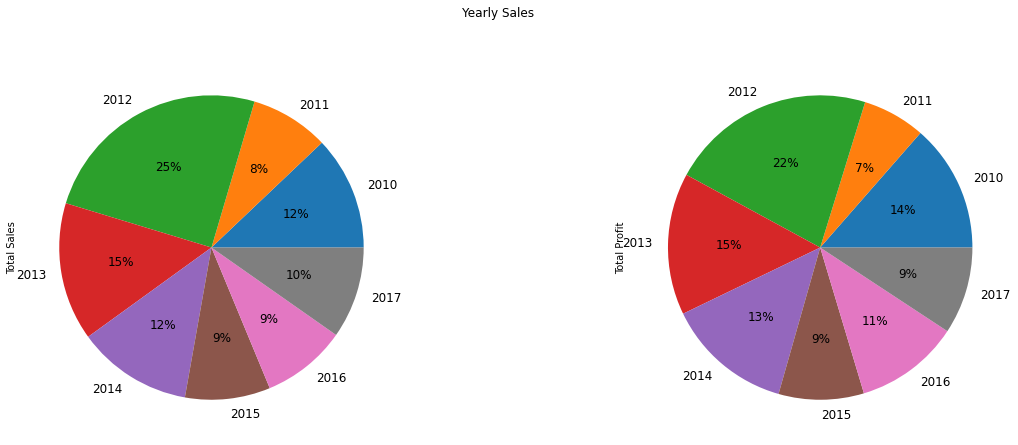

In [ ]:
Yearly_sales[["Total Sales","Total Profit"]].plot( kind="pie",subplots=True, autopct='%1.0f%%',fontsize=12,title='Yearly Sales',legend=False,figsize=(20,7))

In [ ]:
yearly_sales_data=df_amazon.groupby(["Item Type","Year"]).sum()
yearly_sales_data=yearly_sales_data.sort_values("Total Sales", ascending=False)

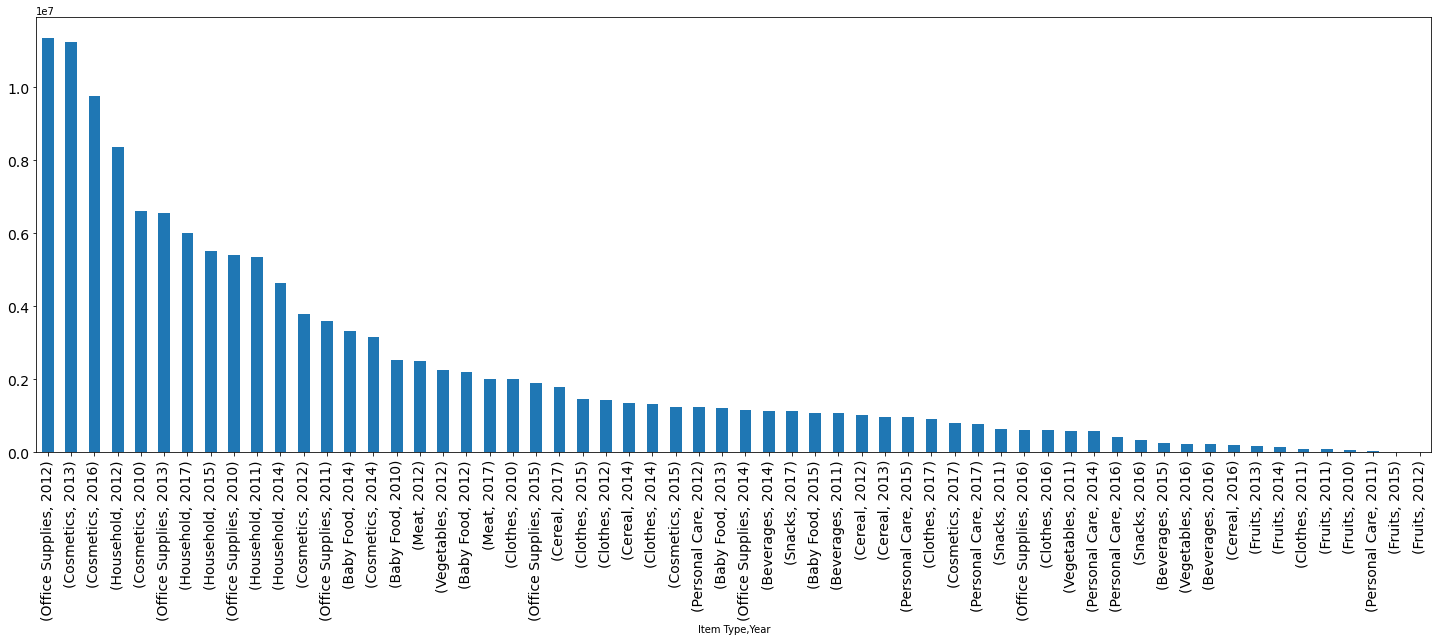

In [ ]:
yearly_sales_data['Total Sales'].plot(figsize=(25,8),kind="bar",fontsize=14)
plt.show()

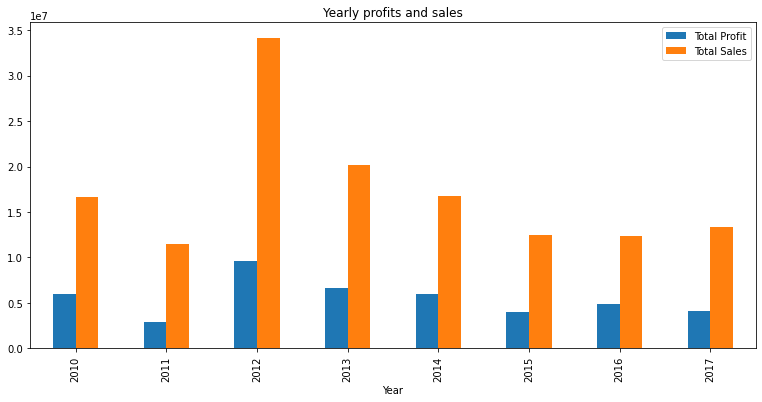

In [ ]:
Yearly_sales[["Total Profit",'Total Sales']].reset_index().set_index("Year").plot(kind="bar",figsize=(13,6),title="Yearly profits and sales")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f598175a640>,
      dtype=object)

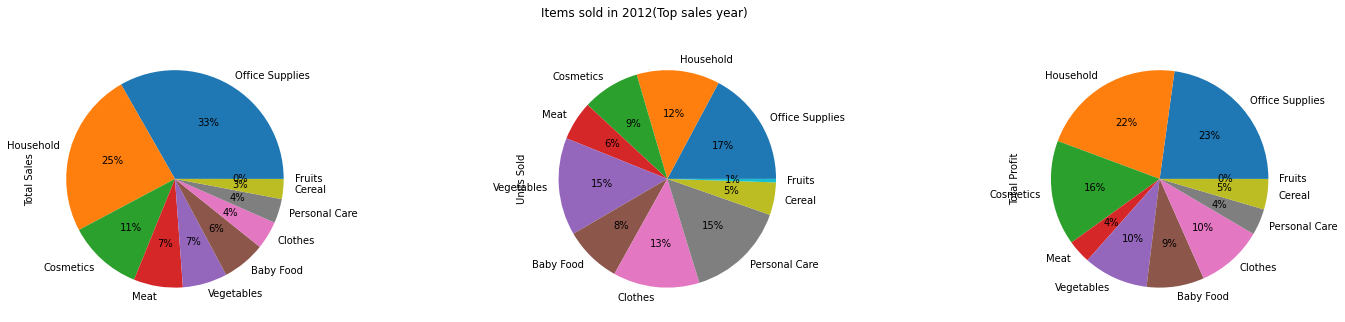

In [ ]:
#Maximum Item contribution in top sales Years
yearly_sales_data.reset_index()[yearly_sales_data.reset_index()['Year']==2012].set_index("Item Type")[["Total Sales","Units Sold","Total Profit"]].plot(kind="pie",subplots=True,title="Items sold in 2012(Top sales year)",autopct="%1.0f%%",legend=False,figsize=(25,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f597ee7acd0>,
      dtype=object)

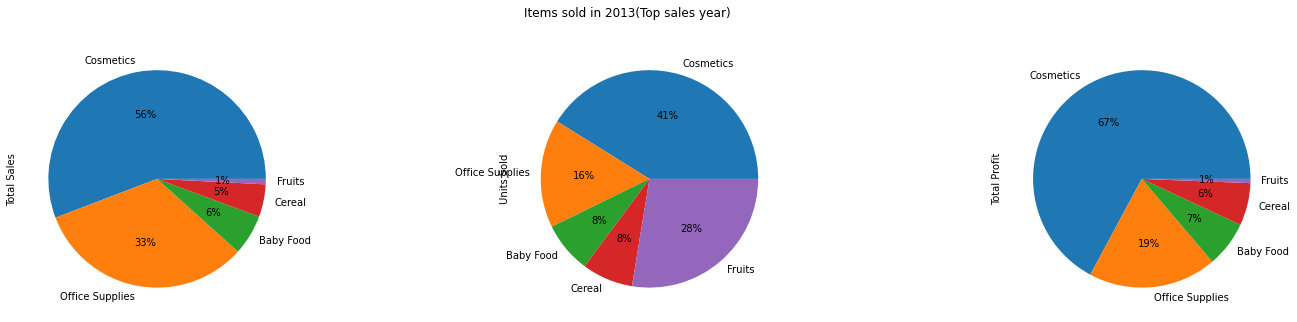

In [ ]:
yearly_sales_data.reset_index()[yearly_sales_data.reset_index()['Year']==2013].set_index("Item Type")[["Total Sales","Units Sold","Total Profit"]].plot(kind="pie",subplots=True,title="Items sold in 2013(Top sales year)",autopct="%1.0f%%",legend=False,figsize=(25,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f59806f8790>,
      dtype=object)

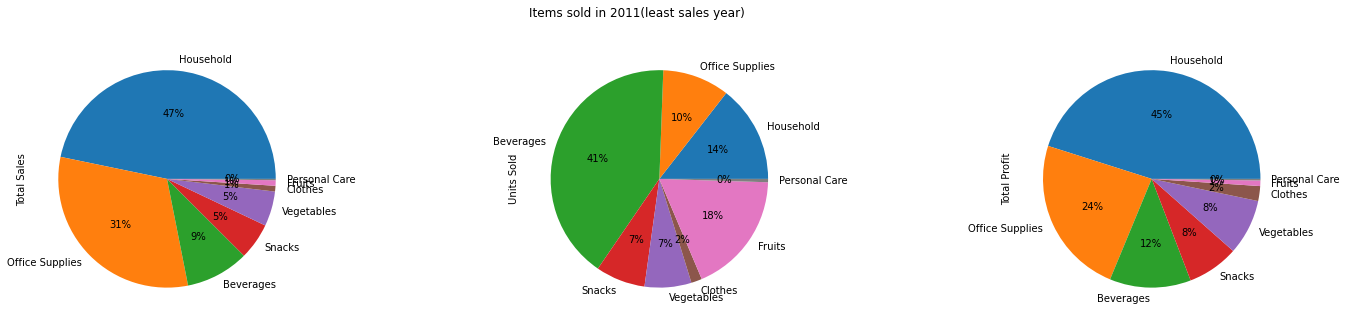

In [ ]:
yearly_sales_data.reset_index()[yearly_sales_data.reset_index()['Year']==2011].set_index("Item Type")[["Total Sales","Units Sold","Total Profit"]].plot(kind="pie",subplots=True,title="Items sold in 2011(least sales year)",autopct="%1.0f%%",legend=False,figsize=(25,5))

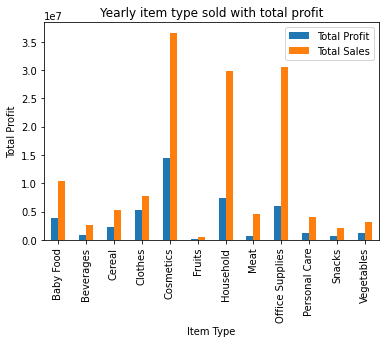

In [ ]:
yearly_profit_data=df_amazon.groupby("Item Type").sum()[["Total Profit","Total Sales"]].plot(kind="bar",title="Yearly item type sold with total profit",ylabel="Total Profit")

###Yearly Insights:
Yearly item sold
- 2012(1st top)

  - Most Sales from office supplies(33% of total sale) items with Household items (25% of total sale) 
  - Most unit sold are Office supplies
  - Most profitable items are Office supplies and Household

- 2013(2nd top)

  -  Most Sales from cosmetics(56% of total sale) items and office supplies(33% of total sale) 
  - Most unit sold are cosmetics and fruits
  - Most profitable items are cosmetics and Office supplies

- 2011(Least sales year)

  -  Most Sales from Household(47% of total sale) items and Office supplies(31% of total sale) 
  - Most unit sold are Beverages and fruits
  - Most profitable items are Household

Most profitable item from(2010-2017) is cosmetics and household

Most sold item from (2010- 2017) is Cosmetics, Household, Office supplies


# **Monthly trend for Sales**


In [ ]:
df_amazon["Ship Date"].dt.strftime("%b")
Monthly_sales=df_amazon.groupby("Month").sum()
Monthly_sales["Total Sales"].reset_index()

,Month,Total Sales
0,1,8884502.45
1,2,21105331.41
2,3,11322021.69
3,4,7402746.81
4,5,11945263.42
5,6,12019913.42
6,7,6016768.51
7,8,11050846.65
8,9,4188045.51
9,10,5314762.56


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f597ec16d90>],
      dtype=object)

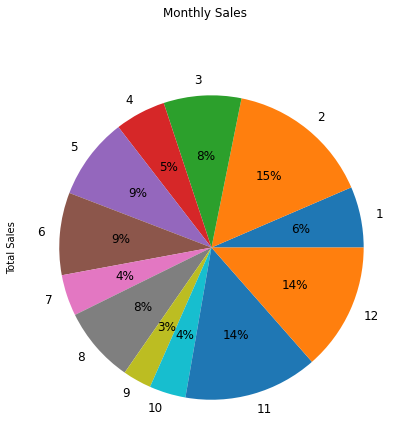

In [ ]:
Monthly_sales["Total Sales"].plot( kind="pie",subplots=True, autopct='%1.0f%%',figsize=(7,7),fontsize=12,title='Monthly Sales')

In [ ]:
#Grouping by Items to get maximum sales per item with month 
Monthly_sales_data=df_amazon.groupby(["Item Type","Month"]).sum()
#Sorting the maximum sales decending manner 
Monthly_sales_data=Monthly_sales_data.sort_values("Total Sales", ascending=False)
Monthly_sales_data['Total Sales'].head(10)

Item Type        Month
Cosmetics        12       13211309.60
Office Supplies  11       10894092.09
Household        2         9772112.21
Office Supplies  5         8789381.37
Cosmetics        8         8545511.20
Baby Food        6         6634471.92
Office Supplies  2         5892799.29
Household        3         5513227.50
                 12        4647149.58
Cosmetics        10        3786589.20
Name: Total Sales, dtype: float64

###Frequency of Items in top 3 sales months 

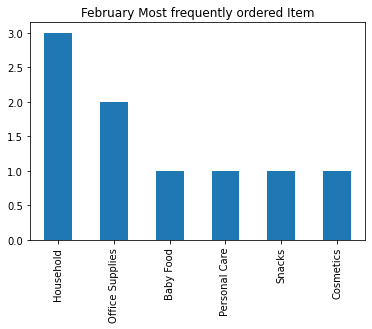

In [ ]:
df_amazon[df_amazon['Month']==2]['Item Type'].value_counts().plot(kind="bar",title='February Most frequently ordered Item')


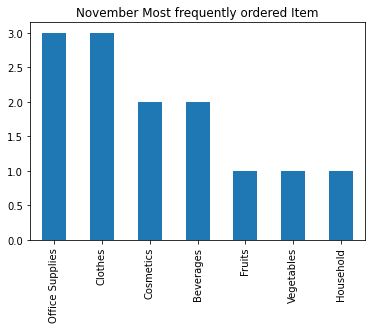

In [ ]:
df_amazon[df_amazon['Month']==11]['Item Type'].value_counts().plot(kind="bar",title='November Most frequently ordered Item')

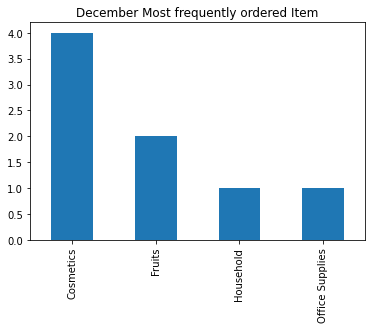

In [ ]:
df_amazon[df_amazon['Month']==12]['Item Type'].value_counts().plot(kind="bar",title='December Most frequently ordered Item')

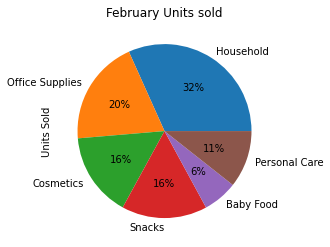

In [ ]:
Monthly_sales_data.reset_index()[Monthly_sales_data.reset_index()["Month"]==2].set_index("Item Type").plot(kind="pie",y="Units Sold",autopct="%1.0f%%",legend=False,title='February Units sold')

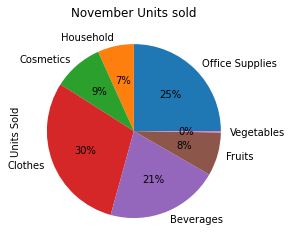

In [ ]:
Monthly_sales_data.reset_index()[Monthly_sales_data.reset_index()["Month"]==11].set_index("Item Type").plot(kind="pie",y="Units Sold",autopct="%1.0f%%",legend=False,title='November Units sold')

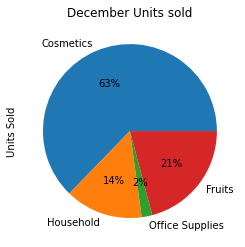

In [ ]:
Monthly_sales_data.reset_index()[Monthly_sales_data.reset_index()["Month"]==12].set_index("Item Type").plot(kind="pie",y="Units Sold",autopct="%1.0f%%",legend=False,title='December Units sold')

In [ ]:
Monthly_sales_data.reset_index()["Item Type"].value_counts()

Cosmetics          8
Household          7
Clothes            7
Office Supplies    6
Cereal             6
Personal Care      6
Fruits             6
Baby Food          5
Vegetables         5
Beverages          5
Snacks             3
Meat               2
Name: Item Type, dtype: int64

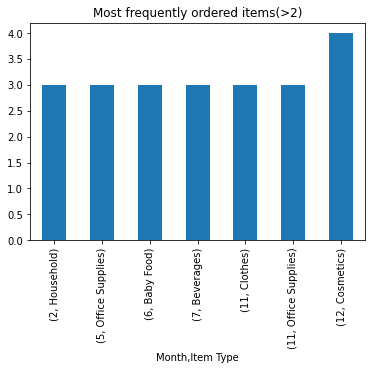

In [ ]:
_A=df_amazon.groupby("Month")["Item Type"].value_counts()
_A[_A>2].plot(kind="bar",title="Most frequently ordered items(>2)")

february has maximum sales i.e. 15% where in November and December there is 2nd highest sale in both month has equal sales i.e 14% of total sales

Most frequently order Item:
  
  - february has Household products it is almost 32% of total sold items in that month
  - November has Office Supplies it is almost 25% of total sold items in that month
    
  - December has Cosmetics it is almost 63% of total sold items in that month   

Hence we can manage our inventory accordingly as we are having most common items for most of month: 

`Cosmetics, Household, Clothes, Office Supplies, Cereal, Personal Care, Fruits`

#**Month-Yearly trend analysis**

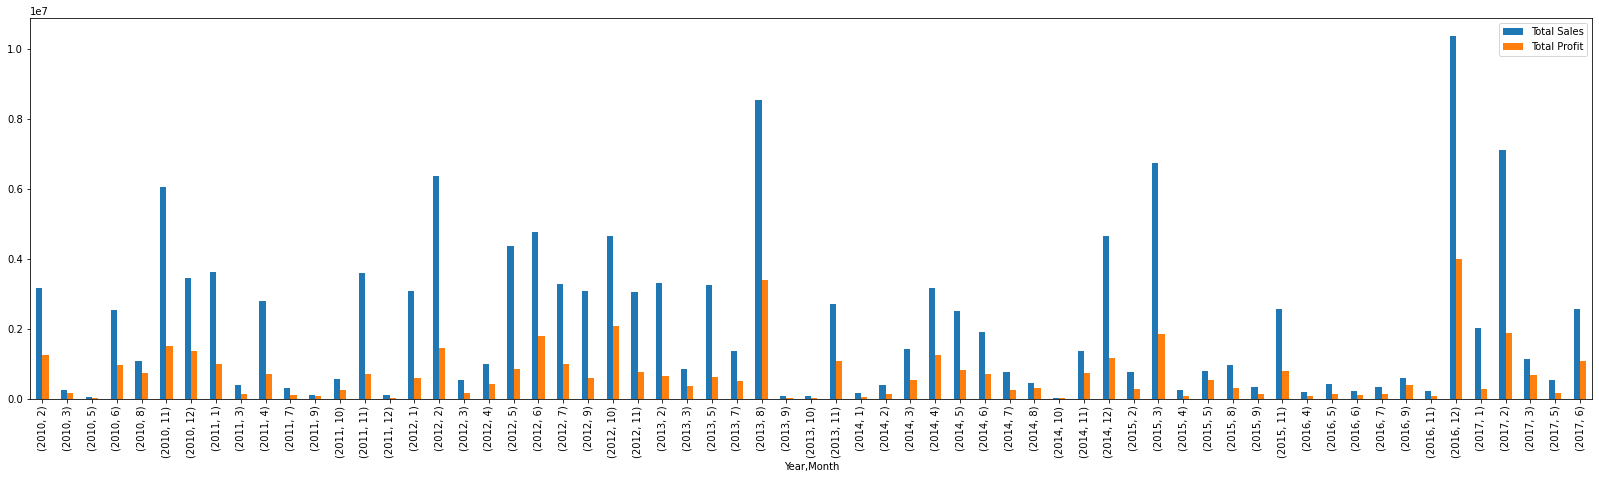

In [ ]:
MY_sum_data=df_amazon.groupby(["Year","Month"]).sum()
MY_sum_data[["Total Sales",'Total Profit']].plot(kind="bar",figsize=(28,7))

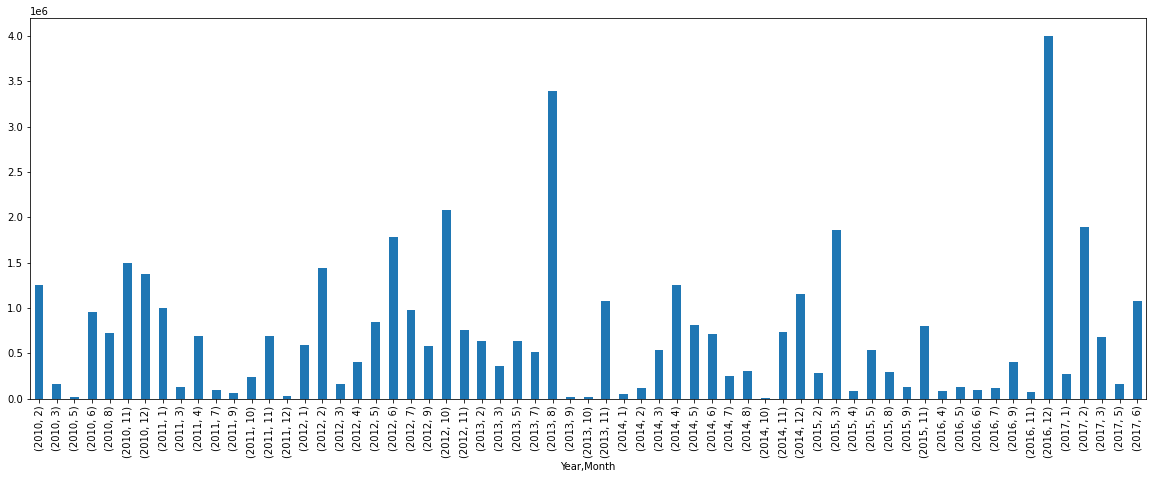

In [ ]:
 MY_sum_data["Total Profit"].plot(kind="bar",figsize=(20,7))

In [ ]:
MY_Data_Item= df_amazon.groupby(["Item Type","Year","Month"]).sum()

In [ ]:
# units sold from (2010-2017)
print(f"""Minimum units sold
{MY_Data_Item["Units Sold"][MY_Data_Item["Units Sold"]==MY_Data_Item["Units Sold"].min()]}""")
print(f"""

Maximum units sold
{MY_Data_Item["Units Sold"][MY_Data_Item["Units Sold"]==MY_Data_Item["Units Sold"].max()]}""")

Minimum units sold
Item Type   Year  Month
Vegetables  2011  7        124
Name: Units Sold, dtype: int64


Maximum units sold
Item Type  Year  Month
Cosmetics  2016  12       22308
Name: Units Sold, dtype: int64


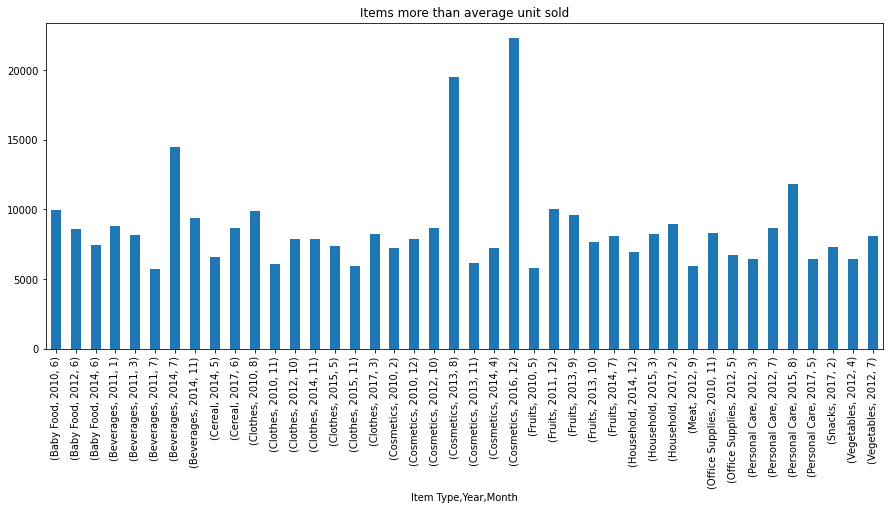

In [ ]:
#Displaying Items more than average unit sold
Average_Unit_sold=MY_Data_Item["Units Sold"].mean()
MY_Data_Item["Units Sold"][MY_Data_Item["Units Sold"]>Average_Unit_sold].plot(kind="bar",figsize=(15,6),title="Items more than average unit sold")

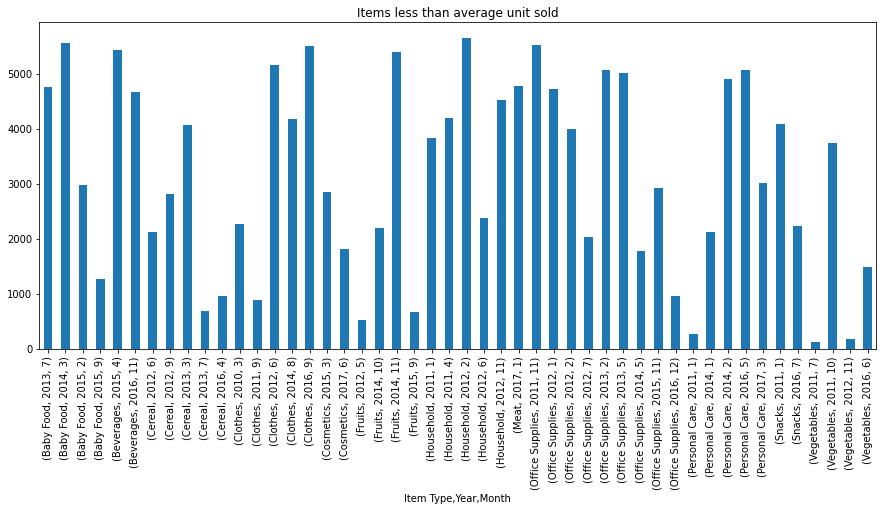

In [ ]:
#Displaying Items less than average unit sold
Average_Unit_sold=MY_Data_Item["Units Sold"].mean()
MY_Data_Item["Units Sold"][MY_Data_Item["Units Sold"]<=Average_Unit_sold].plot(kind="bar",figsize=(15,6),title="Items less than average unit sold",stacked=True)

In [ ]:
df_amazon.groupby(["Year","Month"])["Item Type"].value_counts()[df_amazon.groupby(["Year","Month"])["Item Type"].value_counts()>1]

Year  Month  Item Type      
2011  12     Fruits             2
2012  1      Office Supplies    2
      2      Household          2
      6      Clothes            2
2013  8      Cosmetics          2
      11     Cosmetics          2
2014  7      Beverages          2
2015  8      Personal Care      2
2016  12     Cosmetics          3
Name: Item Type, dtype: int64

In [ ]:
MY_data_Region=df_amazon.groupby(["Region","Country","Item Type","Year","Month"]).sum()
MY_data_sum=MY_data_Region.reset_index()

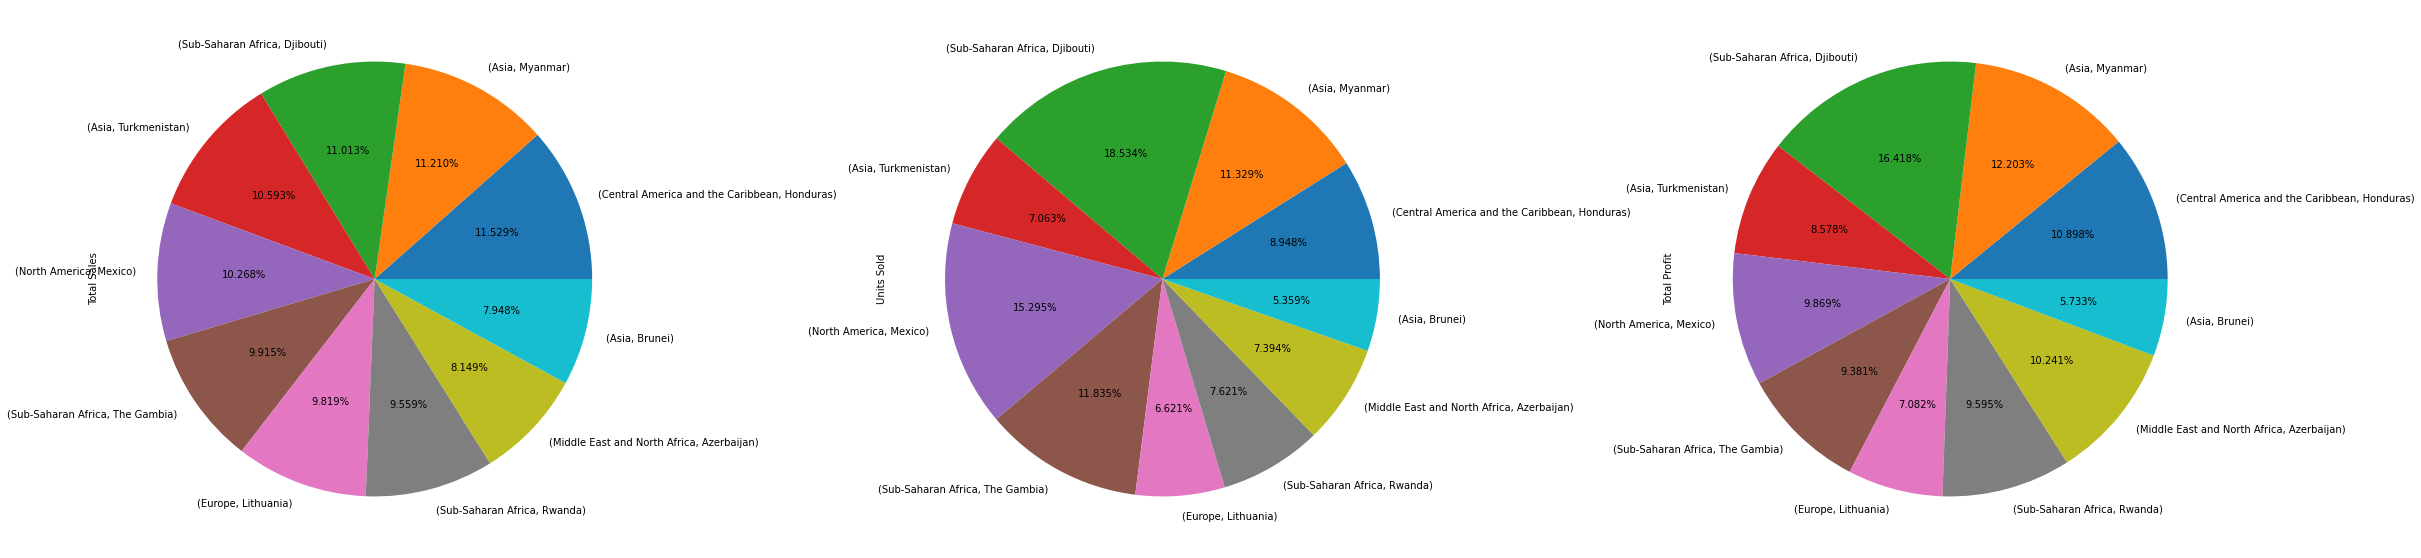

In [ ]:
MY_data_sum.groupby(["Region","Country"])[["Total Sales","Units Sold","Total Profit"]].sum().sort_values("Total Sales",ascending=False).head(10).plot(kind="pie",autopct="%0.3f%%",subplots=True,legend=False,figsize=(40,10))
plt.rc("font",size=14)
plt.show()

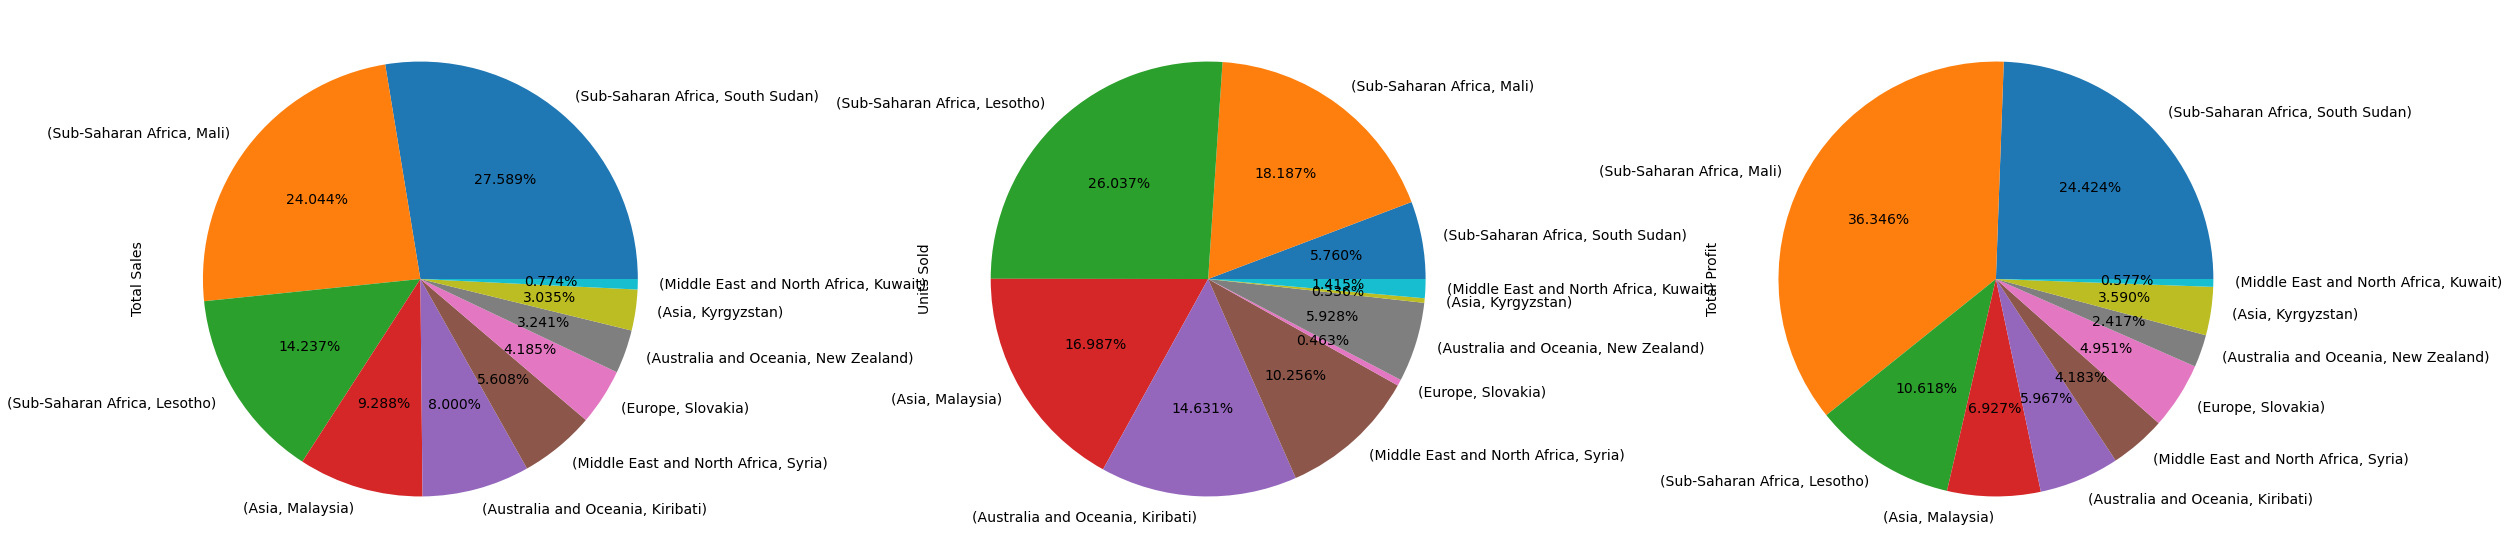

In [ ]:
MY_data_sum.groupby(["Region","Country"])[["Total Sales","Units Sold","Total Profit"]].sum().sort_values("Total Sales",ascending=False).tail(10).plot(kind="pie",autopct="%0.3f%%",subplots=True,legend=False,figsize=(40,10))
plt.rc("font",size=14)
plt.show()

###Monthly-Yearly trend insights:

Highest sales and profit in december 2016

second highest is in august 2013

Maximum units sold 'Cosmetics' at december 2016 qty: "22308"

Minimum Units Sold 'Vegetables' july 2011 qty: '124'

Max frequently ordered item in overall month and year is 'cosmetics'

Max item volume sold in sub-saharan Africa, Lesotho

maximum profit from Sub-Saharan Africa, Mali

Maximum Sales from Sub-Saharan Africa, South Sudan